In [150]:
%load_ext autoreload
%autoreload 2
import numpy as np
from utils.math_functions import generate_MullerBrown
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.LSTM_MullerBrown.recursive_LSTM_PostMeanScore_MullerBrown_T256_H05_tl_110data import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
config = get_config()
paths = generate_MullerBrown(config=config, H=config.hurst,S=1, T=config.ts_length, isUnitInterval=config.t0==1.)

0.1


In [152]:
paths

array([[[-0.68785371,  1.14130852],
        [-0.87010531,  1.43907781],
        [-0.5273127 ,  1.14477754],
        [-0.82343353,  1.47420444],
        [-0.46980332,  1.1676388 ],
        [-0.77121949,  1.48594402],
        [-0.41997582,  1.17161492],
        [-0.71503773,  1.45023682],
        [-0.42227715,  1.20059076],
        [-0.74054262,  1.50404933],
        [-0.39397222,  1.18482512],
        [-0.68305957,  1.45789547],
        [-0.41845534,  1.23410452],
        [-0.75469044,  1.5575091 ],
        [-0.41451258,  1.21273889],
        [-0.73473449,  1.52321113],
        [-0.38917802,  1.19034144],
        [-0.68348529,  1.46123084],
        [-0.41742352,  1.22875483],
        [-0.74938955,  1.54987698],
        [-0.401167  ,  1.21019109],
        [-0.7207221 ,  1.50342724],
        [-0.38725847,  1.18799071],
        [-0.68719411,  1.44642427],
        [-0.42880448,  1.23791956],
        [-0.76446636,  1.5719229 ],
        [-0.42813997,  1.23539896],
        [-0.76050818,  1.570

In [153]:
from configs.RecursiveVPSDE.LSTM_3DLorenz.recursive_LSTM_PostMeanScore_3DLorenz_T256_H05_tl_110data import get_config

In [154]:
from utils.math_functions import generate_Lorenz63
config = get_config()
paths = generate_Lorenz63(config=config, H=config.hurst,S=1000, T=config.ts_length, isUnitInterval=config.t0==1.)

1.0


In [155]:
paths

array([[[-3.84607041e-02, -3.84607041e-02, -3.84607041e-02],
        [-1.48575695e-03, -1.76196200e-03, -1.07934639e-03],
        [-1.05601745e-02, -1.08446747e-02, -1.01414316e-02],
        ...,
        [-2.69715658e+00, -3.57561126e+00,  1.73048573e+00],
        [-2.72489031e+00, -3.59721445e+00,  1.72582937e+00],
        [-2.85242685e+00, -3.71872543e+00,  1.62201209e+00]],

       [[-2.32666340e-02, -2.32666340e-02, -2.32666340e-02],
        [-1.54860338e-02, -1.56517419e-02, -1.52415584e-02],
        [-5.68536458e-02, -5.71278675e-02, -5.64488101e-02],
        ...,
        [ 8.87201889e-02, -2.40059800e-02,  2.69611234e-01],
        [-5.56659575e-03, -1.16881715e-01,  1.72948016e-01],
        [-4.20858681e-02, -1.52566717e-01,  1.35064568e-01]],

       [[ 5.83799819e-02,  5.83799819e-02,  5.83799819e-02],
        [-2.70570646e-02, -2.66598938e-02, -2.76518761e-02],
        [-6.61192465e-03, -6.41102423e-03, -6.91742944e-03],
        ...,
        [-4.10711618e-01, -4.13650182e-01,

(array([5.000e+00, 5.000e+00, 1.100e+01, 7.000e+00, 1.000e+01, 1.400e+01,
        1.300e+01, 2.400e+01, 1.800e+01, 5.000e+00, 1.000e+01, 2.300e+01,
        2.800e+01, 2.000e+01, 1.900e+01, 4.300e+01, 4.200e+01, 5.800e+01,
        5.000e+01, 3.400e+01, 5.000e+01, 5.100e+01, 6.400e+01, 7.700e+01,
        1.150e+02, 1.000e+02, 1.220e+02, 1.500e+02, 1.520e+02, 1.850e+02,
        1.930e+02, 2.190e+02, 2.650e+02, 2.530e+02, 2.860e+02, 2.730e+02,
        3.280e+02, 3.430e+02, 3.510e+02, 3.870e+02, 4.970e+02, 5.880e+02,
        6.270e+02, 6.890e+02, 6.470e+02, 7.740e+02, 8.350e+02, 8.830e+02,
        9.870e+02, 1.096e+03, 1.193e+03, 1.287e+03, 1.400e+03, 1.639e+03,
        1.757e+03, 1.825e+03, 2.005e+03, 2.096e+03, 2.173e+03, 2.287e+03,
        2.522e+03, 2.777e+03, 3.053e+03, 3.181e+03, 3.435e+03, 3.841e+03,
        4.074e+03, 4.432e+03, 4.663e+03, 5.278e+03, 5.741e+03, 6.010e+03,
        6.423e+03, 6.823e+03, 7.410e+03, 8.167e+03, 8.449e+03, 8.745e+03,
        8.599e+03, 8.597e+03, 8.027e+0

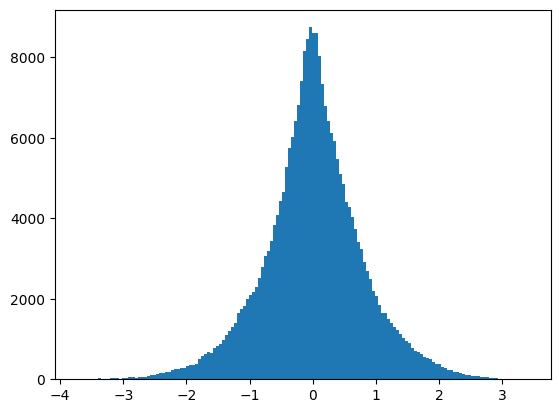

In [156]:
plt.hist(paths[:,:,0].flatten(), bins=150)

In [157]:
print(config.data_path)

/Users/marcos/GitHubRepos/FractionalBrownianMotion/data/3DLnz_samples_t00_dT3906e-03_27e+00Beta_28e+00Rho_10e+00Sigma_10Diff_00Init.npy
